
# Ticket timeseries data exploration

## Data Wrangling

In [1]:
# importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Setting the plot to be embedded inline
%matplotlib inline

In [2]:
# importing these packages to play with file system
import os, sys
# adding the parent directory in the path session variable
sys.path.insert(0,os.path.pardir)
# importing module to clean text file
from src import DataProcessingModule as dp

### Data Gathering
Refer to the [README.md](https://github.com/vaibhavmaurya/BusAndTicketsOptimization/blob/master/README.md) for the following.

- [About Dataset](https://github.com/vaibhavmaurya/BusAndTicketsOptimization/blob/master/README.md#AboutTicketData)
- Information about [Data Processing Module](https://github.com/vaibhavmaurya/BusAndTicketsOptimization/blob/master/README.md#datawrangling) being used for data gathering and cleaning initially.

In [3]:
# Establishing path to directories for data processing.
dir_dict = {
        'raw' : '../data/raw',
        'clean' : '../data/clean_data',
        'process' : '../data/processed',
        'parser' : '../src/datastructure.json',
        'db' : '../data/db'
}
dp_class = dp.DataPreprocessing(dir_dict)

In [4]:
# calling module to convert textual data to csv file
dp_class.processData()

file aug18-dec18.txt is moving to raw directory
file full_data.csv is getting deleted from clean_data directory
>>>>> Data files are reset <<<<<<<
>>>>> Data cleaning starts <<<<<<<
new format is ../data/clean_data/full_data.csv
Text or lst file it is 
>>> Created New output File


In [5]:
# Reading the csv file created by data processing module from textual data
# Combining two columns of the dataset ETD_DATE and ETD_TD_TIME to ETD_DATETIME a single timestamp column
df = pd.read_csv('../data/clean_data/full_data.csv', parse_dates={'ETD_DATETIME':['ETD_DATE','ETD_TD_TIME']})


In [6]:
# Overall structure of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577850 entries, 0 to 577849
Data columns (total 24 columns):
ETD_DATETIME             577850 non-null datetime64[ns]
ETD_WAYBILL_NO           577850 non-null int64
ETD_ROUTE_NO             577850 non-null int64
ETD_ROUTE_TYPE           577850 non-null int64
ETD_TRIP_NO              577850 non-null int64
ETD_TICKET_TYPE          577850 non-null int64
ETD_ADULTS               577850 non-null int64
ETD_CHILD                577850 non-null int64
ETD_AMOUNT               577850 non-null int64
ETD_DEPOT_CODE           577850 non-null int64
ETD_BATTERY_VOLT         577850 non-null float64
ETD_CUR_STOP_NAME        577850 non-null object
ETD_DST_STOP_NAME        577850 non-null object
ETD_KMS                  577850 non-null int64
ETD_TICKET_TYPE_DESCR    577850 non-null object
ETD_TRIP_DIRECTION       577850 non-null object
ETD_TICKET_NO            577850 non-null int64
ETD_TICKET_SUBNO         577850 non-null int64
ETD_CUR_STOP_NO          577

In [7]:
# First 5 rows of the data
df.head()

,ETD_DATETIME,ETD_WAYBILL_NO,ETD_ROUTE_NO,ETD_ROUTE_TYPE,ETD_TRIP_NO,ETD_TICKET_TYPE,ETD_ADULTS,ETD_CHILD,ETD_AMOUNT,ETD_DEPOT_CODE,...,ETD_TICKET_TYPE_DESCR,ETD_TRIP_DIRECTION,ETD_TICKET_NO,ETD_TICKET_SUBNO,ETD_CUR_STOP_NO,ETD_CUR_STOP_CODE,ETD_DST_STOP_NO,ETD_DST_STOP_CODE,ETD_CUR_SUB_STAGE,ETD_DST_SUB_STAGE
0,2018-08-01 23:57:13,620278,1,1,1,8,0,0,0,201,...,STAGE CHNGE,U,216253,0,4,5,4,6,0,0
1,2018-08-01 22:50:58,620282,1,1,1,1,1,0,250,201,...,PASSENGER,U,264972,0,1,1,16,42,0,0
2,2018-08-01 21:56:58,620281,1,1,1,1,5,0,725,201,...,PASSENGER,U,215302,0,1,1,9,24,0,0
3,2018-08-01 21:58:11,620281,1,1,1,1,1,0,250,201,...,PASSENGER,U,215303,0,1,1,16,42,0,0
4,2018-08-01 22:30:57,620281,1,1,1,1,2,0,500,201,...,PASSENGER,U,215304,0,1,1,16,42,0,0


In [8]:
# Giving a closer look to a single row
df.iloc[0]

ETD_DATETIME             2018-08-01 23:57:13
ETD_WAYBILL_NO                        620278
ETD_ROUTE_NO                               1
ETD_ROUTE_TYPE                             1
ETD_TRIP_NO                                1
ETD_TICKET_TYPE                            8
ETD_ADULTS                                 0
ETD_CHILD                                  0
ETD_AMOUNT                                 0
ETD_DEPOT_CODE                           201
ETD_BATTERY_VOLT                        8.04
ETD_CUR_STOP_NAME                NELAMANGALA
ETD_DST_STOP_NAME                NELAMANGALA
ETD_KMS                                    0
ETD_TICKET_TYPE_DESCR            STAGE CHNGE
ETD_TRIP_DIRECTION                         U
ETD_TICKET_NO                         216253
ETD_TICKET_SUBNO                           0
ETD_CUR_STOP_NO                            4
ETD_CUR_STOP_CODE                          5
ETD_DST_STOP_NO                            4
ETD_DST_STOP_CODE                          6
ETD_CUR_SU

In [9]:
# Columns in the dataset
df.columns

Index(['ETD_DATETIME', 'ETD_WAYBILL_NO', 'ETD_ROUTE_NO', 'ETD_ROUTE_TYPE',
       'ETD_TRIP_NO', 'ETD_TICKET_TYPE', 'ETD_ADULTS', 'ETD_CHILD',
       'ETD_AMOUNT', 'ETD_DEPOT_CODE', 'ETD_BATTERY_VOLT', 'ETD_CUR_STOP_NAME',
       'ETD_DST_STOP_NAME', 'ETD_KMS', 'ETD_TICKET_TYPE_DESCR',
       'ETD_TRIP_DIRECTION', 'ETD_TICKET_NO', 'ETD_TICKET_SUBNO',
       'ETD_CUR_STOP_NO', 'ETD_CUR_STOP_CODE', 'ETD_DST_STOP_NO',
       'ETD_DST_STOP_CODE', 'ETD_CUR_SUB_STAGE', 'ETD_DST_SUB_STAGE'],
      dtype='object')

In [10]:
# Distinct trips in the dataset
df.ETD_TRIP_NO.unique()

array([1, 2, 3, 5, 6, 4, 7, 8])

In [11]:
# Distinct ticket types in the dataset
df.ETD_TICKET_TYPE.unique()

array([ 8,  1, 11, 12, 33, 10, 94,  2, 29, 36, 14, 37, 44, 91, 15, 21, 92,
       38, 32, 95, 57, 39, 17, 13, 19, 16, 28,  9])

In [12]:
# Relationship between ETD_TICKET_TYPE and ETD_TICKET_TYPE_DESCR
df.groupby("ETD_TICKET_TYPE").ETD_TICKET_TYPE_DESCR.unique()

ETD_TICKET_TYPE
1     [PASSENGER, -----------, I.PASSENGER]
2                [LUGGAGE TKT, -----------]
8                             [STAGE CHNGE]
9                               [TOLL GATE]
10                            [POLICEWARNT]
11                            [STUDENT PAS]
12                            [GENERAL PAS]
13                            [MLA/MLC PAS]
14                            [HANDICAP PA]
15                             [BLIND PASS]
16                            [FREEDOM FIG]
17                            [AWARD WINNE]
19                                 [EX-MLC]
21                 [-----------, INSP CASE]
28                            [ROUTE SELCT]
29                  [-----------, TRIP END]
32                [-----------, JOURNALIST]
33               [-----------, SENIORCITIZ]
36                             [TRIP SHEET]
37                             [STATUS RPT]
38                            [TKTDETAILRP]
39                            [STG.WISE.RP]
44              

### Structure of Dataset
Overall picture of dataset is as below.
- There are 577850 rows and 24 columns.
- There are 4 columns of datatype string, rest all are numeric.
- There is one column ETD_WAYBILL_NO which identifies a bus uniquely.
- There is one column ETD_ROUTE_NO which identifies a route of the bus uniquely.
- There are 6 categorical columns even though they are numeric. Those are "ETD_ROUTE_TYPE", "ETD_TICKET_TYPE", "ETD_DEPOT_CODE", "ETD_CUR_STOP_NAME", "ETD_DST_STOP_NAME" and "ETD_TRIP_DIRECTION".
- There are 5 quantitative columns. those are "ETD_ADULTS", "ETD_CHILD", "ETD_AMOUNT", "ETD_BATTERY_VOLT" and "ETD_KMS"
- ETD_CUR_STOP_NO is the indetifier of bus stop and ETD_CUR_STOP_NAME is the name of the bus stop. The same follows with ETD_DST_STOP_NO and ETD_DST_STOP_NAME
- ETD_CUR_STOP_CODE is assumed to be code of the bus stop though there is already a field ETD_CUR_STOP_NO to uniquely identify a bus stop. Field ETD_CUR_STOP_CODE, purpose is unknown. Same follows with ETD_DST_STOP_CODE.

### Scope of the Data Exploration
Idea is to 
- Explore distribution of tickets issued to passengers. It's relationship to ticket type, date time, bus stops etc.
- Explore the fare recieved from passengers.


### Certain Data changes

- ETD_ADULTS and ETD_CHILD columns depict no of adults and children boarded the bus. These columns can be combined to one single column PASSENGERS.
- Some rows contains ETD_ADULTS and ETD_CHILD as 0. These rows are specific to certain purposes defined by [KSRTC](https://github.com/vaibhavmaurya/BusAndTicketsOptimization/blob/master/README.md#OrgBackground). These rows does not contain information about ticket issued and so these are out of the scope.
- Columns ETD_CUR_SUB_STAGE, ETD_DST_SUB_STAGE and ETD_TICKET_SUBNO are always 0. It is better to remove them.
- ETD_BATTERY_VOLT column is battery voltage of the bus when ticket is issued. This column is out of scope
- ETD_DST_STOP_CODE and ETD_CUR_STOP_CODE, both fields the purpose is not known.
- It would be good to have fate and time decomposed to month and week. So that monthly and weekly behavior can be analysed further.
- Decompose date and time column to month, week and weekday columns. These columns will be used to find passengers congestion based on various time frames.

In [13]:
# Combining ETD_ADULTS and ETD_CHILD to PASSENGERS
df["PASSENGERS"] = df.ETD_ADULTS + df.ETD_CHILD
df.drop(columns=["ETD_ADULTS","ETD_CHILD"], axis=1, inplace=True)
df.iloc[0]

ETD_DATETIME             2018-08-01 23:57:13
ETD_WAYBILL_NO                        620278
ETD_ROUTE_NO                               1
ETD_ROUTE_TYPE                             1
ETD_TRIP_NO                                1
ETD_TICKET_TYPE                            8
ETD_AMOUNT                                 0
ETD_DEPOT_CODE                           201
ETD_BATTERY_VOLT                        8.04
ETD_CUR_STOP_NAME                NELAMANGALA
ETD_DST_STOP_NAME                NELAMANGALA
ETD_KMS                                    0
ETD_TICKET_TYPE_DESCR            STAGE CHNGE
ETD_TRIP_DIRECTION                         U
ETD_TICKET_NO                         216253
ETD_TICKET_SUBNO                           0
ETD_CUR_STOP_NO                            4
ETD_CUR_STOP_CODE                          5
ETD_DST_STOP_NO                            4
ETD_DST_STOP_CODE                          6
ETD_CUR_SUB_STAGE                          0
ETD_DST_SUB_STAGE                          0
PASSENGERS

In [14]:
# Removing rows where PASSENGERS boarded are 0
df.drop(index = df[df.PASSENGERS == 0].index, inplace=True)
df[df.PASSENGERS == 0]

,ETD_DATETIME,ETD_WAYBILL_NO,ETD_ROUTE_NO,ETD_ROUTE_TYPE,ETD_TRIP_NO,ETD_TICKET_TYPE,ETD_AMOUNT,ETD_DEPOT_CODE,ETD_BATTERY_VOLT,ETD_CUR_STOP_NAME,...,ETD_TRIP_DIRECTION,ETD_TICKET_NO,ETD_TICKET_SUBNO,ETD_CUR_STOP_NO,ETD_CUR_STOP_CODE,ETD_DST_STOP_NO,ETD_DST_STOP_CODE,ETD_CUR_SUB_STAGE,ETD_DST_SUB_STAGE,PASSENGERS


In [15]:
# removing columns ETD_CUR_SUB_STAGE, ETD_DST_SUB_STAGE and ETD_TICKET_SUBNO
df.drop(columns=["ETD_CUR_SUB_STAGE","ETD_DST_SUB_STAGE", "ETD_TICKET_SUBNO"],inplace=True)
df.head()

,ETD_DATETIME,ETD_WAYBILL_NO,ETD_ROUTE_NO,ETD_ROUTE_TYPE,ETD_TRIP_NO,ETD_TICKET_TYPE,ETD_AMOUNT,ETD_DEPOT_CODE,ETD_BATTERY_VOLT,ETD_CUR_STOP_NAME,ETD_DST_STOP_NAME,ETD_KMS,ETD_TICKET_TYPE_DESCR,ETD_TRIP_DIRECTION,ETD_TICKET_NO,ETD_CUR_STOP_NO,ETD_CUR_STOP_CODE,ETD_DST_STOP_NO,ETD_DST_STOP_CODE,PASSENGERS
1,2018-08-01 22:50:58,620282,1,1,1,1,250,201,8.16,BENGALURU,BHADRAVATHI,265,PASSENGER,U,264972,1,1,16,42,1
2,2018-08-01 21:56:58,620281,1,1,1,1,725,201,8.00,BENGALURU,TIPTUR,146,PASSENGER,U,215302,1,1,9,24,5
3,2018-08-01 21:58:11,620281,1,1,1,1,250,201,8.00,BENGALURU,BHADRAVATHI,265,PASSENGER,U,215303,1,1,16,42,1
4,2018-08-01 22:30:57,620281,1,1,1,1,500,201,8.01,BENGALURU,BHADRAVATHI,265,PASSENGER,U,215304,1,1,16,42,2
5,2018-08-01 22:31:36,620281,1,1,1,1,145,201,8.01,BENGALURU,TIPTUR,146,PASSENGER,U,215305,1,1,9,24,1


In [16]:
#  Removing ETD_BATTERY_VOLT from the data
df.drop(columns=["ETD_BATTERY_VOLT"],inplace=True)
df.head()

,ETD_DATETIME,ETD_WAYBILL_NO,ETD_ROUTE_NO,ETD_ROUTE_TYPE,ETD_TRIP_NO,ETD_TICKET_TYPE,ETD_AMOUNT,ETD_DEPOT_CODE,ETD_CUR_STOP_NAME,ETD_DST_STOP_NAME,ETD_KMS,ETD_TICKET_TYPE_DESCR,ETD_TRIP_DIRECTION,ETD_TICKET_NO,ETD_CUR_STOP_NO,ETD_CUR_STOP_CODE,ETD_DST_STOP_NO,ETD_DST_STOP_CODE,PASSENGERS
1,2018-08-01 22:50:58,620282,1,1,1,1,250,201,BENGALURU,BHADRAVATHI,265,PASSENGER,U,264972,1,1,16,42,1
2,2018-08-01 21:56:58,620281,1,1,1,1,725,201,BENGALURU,TIPTUR,146,PASSENGER,U,215302,1,1,9,24,5
3,2018-08-01 21:58:11,620281,1,1,1,1,250,201,BENGALURU,BHADRAVATHI,265,PASSENGER,U,215303,1,1,16,42,1
4,2018-08-01 22:30:57,620281,1,1,1,1,500,201,BENGALURU,BHADRAVATHI,265,PASSENGER,U,215304,1,1,16,42,2
5,2018-08-01 22:31:36,620281,1,1,1,1,145,201,BENGALURU,TIPTUR,146,PASSENGER,U,215305,1,1,9,24,1


In [17]:
# Removing fields ETD_CUR_STOP_CODE and ETD_DST_STOP_CODE
df.drop(columns=["ETD_CUR_STOP_CODE", "ETD_DST_STOP_CODE"],inplace=True)
df.head()

,ETD_DATETIME,ETD_WAYBILL_NO,ETD_ROUTE_NO,ETD_ROUTE_TYPE,ETD_TRIP_NO,ETD_TICKET_TYPE,ETD_AMOUNT,ETD_DEPOT_CODE,ETD_CUR_STOP_NAME,ETD_DST_STOP_NAME,ETD_KMS,ETD_TICKET_TYPE_DESCR,ETD_TRIP_DIRECTION,ETD_TICKET_NO,ETD_CUR_STOP_NO,ETD_DST_STOP_NO,PASSENGERS
1,2018-08-01 22:50:58,620282,1,1,1,1,250,201,BENGALURU,BHADRAVATHI,265,PASSENGER,U,264972,1,16,1
2,2018-08-01 21:56:58,620281,1,1,1,1,725,201,BENGALURU,TIPTUR,146,PASSENGER,U,215302,1,9,5
3,2018-08-01 21:58:11,620281,1,1,1,1,250,201,BENGALURU,BHADRAVATHI,265,PASSENGER,U,215303,1,16,1
4,2018-08-01 22:30:57,620281,1,1,1,1,500,201,BENGALURU,BHADRAVATHI,265,PASSENGER,U,215304,1,16,2
5,2018-08-01 22:31:36,620281,1,1,1,1,145,201,BENGALURU,TIPTUR,146,PASSENGER,U,215305,1,9,1


In [18]:
# Adding month and week component of date and time
df["WEEK"] = df.ETD_DATETIME.dt.strftime('%U')
df["MONTH"] = df.ETD_DATETIME.dt.month
df["WEEKDAY"] = df.ETD_DATETIME.dt.weekday

#### Export this cleaned data set to csv file "initialy_cleaned_tickets.csv" for covenience.



In [19]:
### Exporting this dataset to csv file
df.to_csv("cleaned_tickets_sold_dataset.csv",index=False)

## Univariate Data exploration

### About ETD_DATETIME

#### 1. What is the time span of dataset?
#### 2. What is the distribution of ticket sale monthly and week of the year ?

In [20]:
# Know the time span of dataset
df.ETD_DATETIME.describe()

count                  466956
unique                 455685
top       2018-09-11 09:23:53
freq                        4
first     2018-08-01 00:00:29
last      2018-12-31 23:52:24
Name: ETD_DATETIME, dtype: object

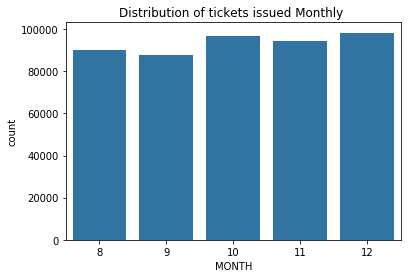

In [21]:
# Distribution of tickets issued Monthly
default_color = sb.color_palette()[0]
sb.countplot(data = df, x ='MONTH', color = default_color)
plt.title("Distribution of tickets issued Monthly ");


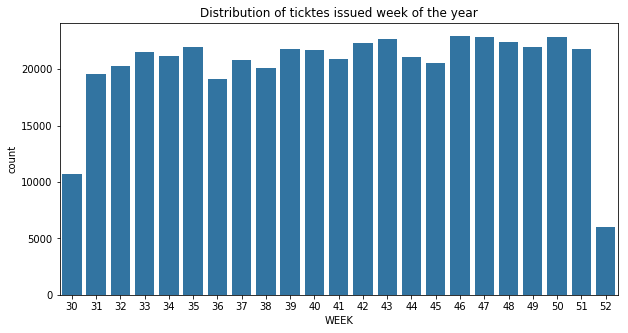

In [22]:
# Distribution of ticktes issued weekly throughout the dataset
fig, ax = plt.subplots(nrows=1, figsize = [10,5])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'WEEK', color = default_color, ax = ax)
plt.title("Distribution of ticktes issued week of the year");

- Dataset timeline starts from 1st Aug 2018 and ends on 31 Dec 2018.
- As per the above bar chart "Distribution of tickets issued Monthly", maximum tickets sold in December and least in September
- As per the chart "Distribution of ticktes issued week of the year", data is almost consistent from week 31 to 51 but the week 30 and 52 shows least tickets sold. This is because there is no full data for week 30 and 52. The timeline starts from the mid of the week 30 and ends at mid of the week 52

### About ETD_ROUTE_TYPE
#### How many route types are there in the dataset?
There is only one route type in the dataset

In [23]:
# No of route type in the dataset
df["ETD_ROUTE_TYPE"].unique()

array([1])

### About ETD_ROUTE_NO
#### How many routes are there in the dataset?
There is only one route in the dataset

In [24]:
# No of route no in the dataset
df.ETD_ROUTE_NO.unique()

array([1])

### About ETD_WAYBILL_NO:
#### How many buses are there in the dataset?
There are total number of buses in the dataset: 2805

In [25]:
# Total number of buses in the dataset
df.ETD_WAYBILL_NO.nunique()

2805

### About ETD_TICKET_TYPE:
#### 1. How many ticket types are there in the dataset ?
#### 2. What is the ticket sales based on ticket types ?

- Unique ETD_TICKET_TYPEs in the dataset.

In [26]:
df["ETD_TICKET_TYPE"].unique()

array([ 1, 11, 12, 33, 10,  2, 14, 15, 21, 32, 57, 17, 13, 19, 16])

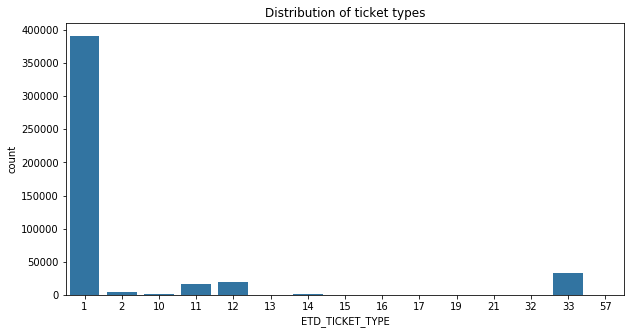

In [27]:
# Distribution of ticket types throughout the dataset
fig, ax = plt.subplots(nrows=1, figsize = [10,5])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ETD_TICKET_TYPE', color = default_color, ax = ax)
plt.title("Distribution of ticket types");

- Here we can see that the ticket type 1 covers maximum of the dataset.
- second maximum is ticket type 33.


### About ETD_DEPOT_CODE
#### How many depots are there in the dataset?
- There is only one depot in the dataset

In [28]:
df["ETD_DEPOT_CODE"].unique()

array([201])

### Bus stops in the dataset
#### How many bus stops are there in the dataset?
- There are 17 bus stops in the dataset.

In [29]:
# No of bus stops
len(set(list(df["ETD_CUR_STOP_NAME"].unique()) + list(df["ETD_DST_STOP_NAME"].unique())))

17

### About ETD_TRIP_DIRECTION
#### 1. How many trip directions are there in the dataset?
#### 2. What is the distribution of ticket sales based on trip direction ?

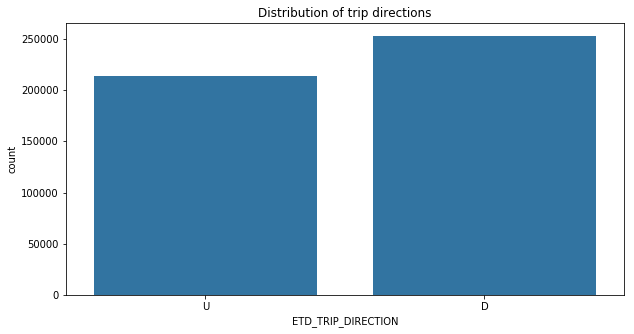

In [30]:
# Trip directions distribution throughout the dataset
fig, ax = plt.subplots(nrows=1, figsize = [10,5])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ETD_TRIP_DIRECTION', color = default_color, ax = ax)
plt.title("Distribution of trip directions");

- Here maximum tickets sold for downward direction.

### About PASSENGERS:
#### Lets check the necessary statistics.

In [31]:
# Describe passengers in the dataset
df.PASSENGERS.describe()

count    466956.000000
mean          1.368349
std           1.062739
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          32.000000
Name: PASSENGERS, dtype: float64

- Maximum passengers boarded a bus is 32, which seems unrealistic or very rare.
- Minimum, median and mean are almost same, which means that in more than 75% of the data one ticket sold contains only one passenger.

### About ETD_AMOUNT:
#### 1. What is the distribution of fares recieved in the dataset?
#### 2. Check the useful statistics of fares recieved?

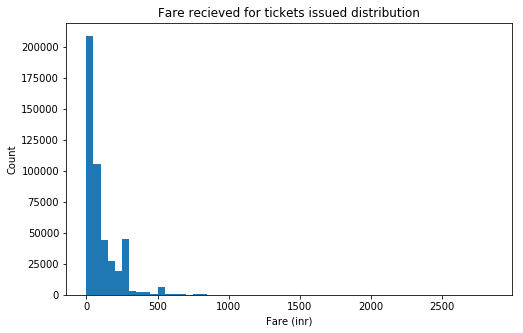

In [32]:
# start with a standard-scaled plot for ETD_AMOUNT
binsize = 50
bins = np.arange(0, df['ETD_AMOUNT'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'ETD_AMOUNT', bins = bins)
plt.xlabel('Fare (inr)')
plt.ylabel('Count')
plt.title('Fare recieved for tickets issued distribution')
plt.show();

In [33]:
df['ETD_AMOUNT'].describe()

count    466956.000000
mean        100.141379
std         121.750042
min           0.000000
25%          25.000000
50%          55.000000
75%         145.000000
max        2820.000000
Name: ETD_AMOUNT, dtype: float64

- Here more 75% of the tickets sold for fare less than and equal to 145.
- There is a maximum fare taken which is 2820, which is because the ticket sold may have more than one passengers. As already analysed column PASSENGERS, throughout the data maximum one ticket sold to one passenger.

### About ETD_KMS (Distance between two bus stops)
#### 1. What is the distribution of distance between two bus stops in the dataset ?
#### 2. Check the useful statistics of distance between ?

In [34]:
# Describe distance between stops in Kilometers
df.ETD_KMS.describe()

count    466956.000000
mean         87.395962
std          86.738131
min           0.000000
25%          24.000000
50%          52.000000
75%         128.000000
max         277.000000
Name: ETD_KMS, dtype: float64

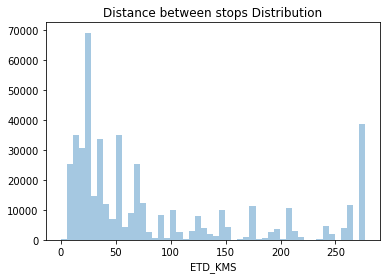

In [35]:
sb.distplot(df.ETD_KMS,kde=False )
plt.title("Distance between stops Distribution");

- Average distance is 87, which is different from median 52. Standard deviation is considerably high.
- Though in the distribution chart it seems the maximum tickets sold for distance between more than 0 to less than 55.
- 75% of tickets sold for distance less than or equal to 128.
- There is a ticket for minimum distance 0, which seems unlikely.

## Bivariate Data exploration

### Scope of analysis
- There are two numeric variables ETD_AMOUNT, PASSENGERS and ETD_KMS
- There are  categorical variables ETD_WAYBILL_NO, ETD_TRIP_NO, ETD_TICKET_TYPE, ETD_CUR_STOP_NO and ETD_DST_STOP_NO
- There are variables whose count with desired grouping matters are ETD_WAYBILL_NO (no of buses) and ETD_TRIP_NO (no of trips)

In [36]:
# Collect all relevant variables
numeric_vars = ['ETD_AMOUNT', 'PASSENGERS', 'ETD_KMS']
categoric_vars = ['ETD_TICKET_TYPE',"ETD_CUR_STOP_NO","ETD_DST_STOP_NO"]
count_vars = ['ETD_WAYBILL_NO', 'ETD_TRIP_NO']


### Correlation plot for all numeric variables
Let see if there are any correlations among numeric variables. ETD_AMOUNT (Fare Recieved), PASSENGERS (# of passengers boarded on a ticket) and ETD_KMS (distance between two stops)

Here there should be a correlation between fares recieved and ETD_KMS. But correlation of either with PASSENGERS would be interesting.

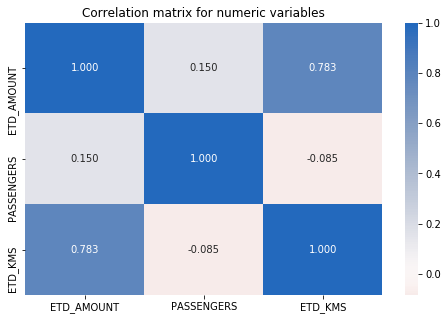

In [49]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Correlation matrix for numeric variables")
plt.show();


- Here there is a strong positive correlation between ETD_AMOUNT and ETD_KMS, which evdident though. Though the fare recieved depends on no of passengers per ticket also.
- Rest combinations does not show any correlation.

#### Correlation between ETD_AMOUNT and ETD_KMS can be visualized as below:

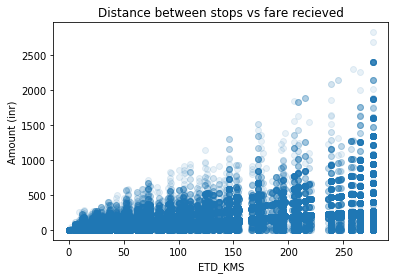

In [38]:
# scatter plot of Distance in KMS vs. Amount in inr, with log transform on price axis

plt.scatter(data = df, x = 'ETD_KMS', y = 'ETD_AMOUNT', alpha = 1/10)
plt.xlabel('ETD_KMS')
plt.ylabel('Amount (inr)')
plt.title("Distance between stops vs fare recieved")
plt.show();

### No of buses with trips
How many buses were running per trip throughout the data ?

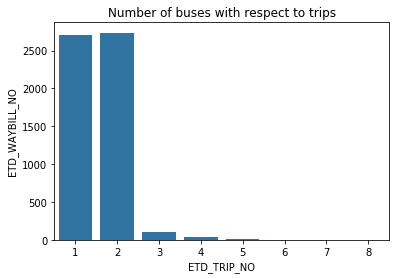

In [39]:
# Number of buses running for trips
a = (df.groupby("ETD_TRIP_NO").ETD_WAYBILL_NO.nunique())
default_color = sb.color_palette()[0]
sb.barplot(x=a.index, y=a, color=default_color)
plt.title("Number of buses with respect to trips");

- Here for trip no 1 and 2, maximum buses are allocated.
- Since there are only 2805 buses in the dataset. It means buses are running for both trips 1 and 2

### Bus stops boarded by passengers in a given trip
Here the intention is to learn about how many bus stops were busy per trip?


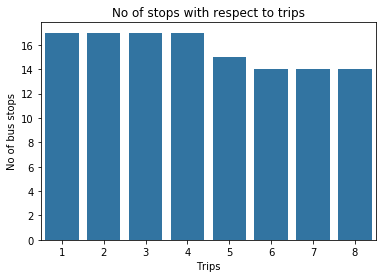

In [40]:
a = (df.groupby("ETD_TRIP_NO").ETD_CUR_STOP_NO.nunique())
default_color = sb.color_palette()[0]
sb.barplot(x=a.index, y=a, color=default_color)
plt.title("No of stops with respect to trips")
plt.ylabel("No of bus stops")
plt.xlabel("Trips");

- There are 17 bus stops
- In trips 6, 7 and 8, buses passes through 14 bus stops, in trip 5 bus passes through 15 bus stops and , trips 1,2,3, and 4 bus passes through all bus stops.

### Ticket type vs passengers
Here the intentions are as follows:
- What is the distribution of passengers boarded per ticket type?
- Average passengers per ticket ?
- Average passengers per boarding bus stop ?

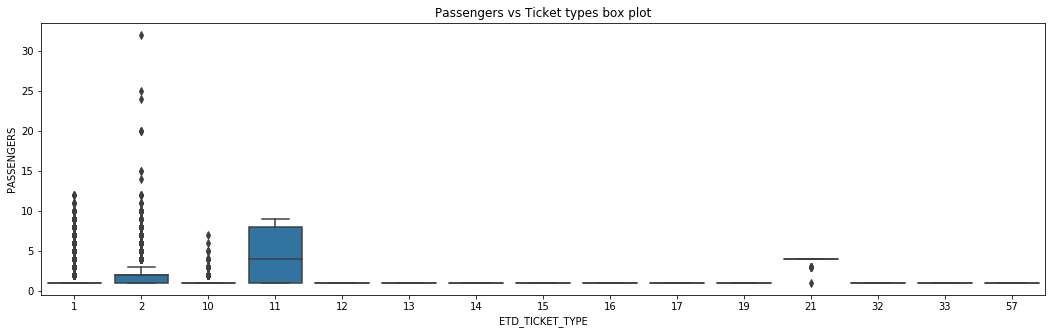

In [48]:
plt.figure(figsize=[18, 5])
sb.boxplot(data = df, x = 'ETD_TICKET_TYPE', y = 'PASSENGERS',
               color = default_color)
plt.title("Passengers vs Ticket types box plot");

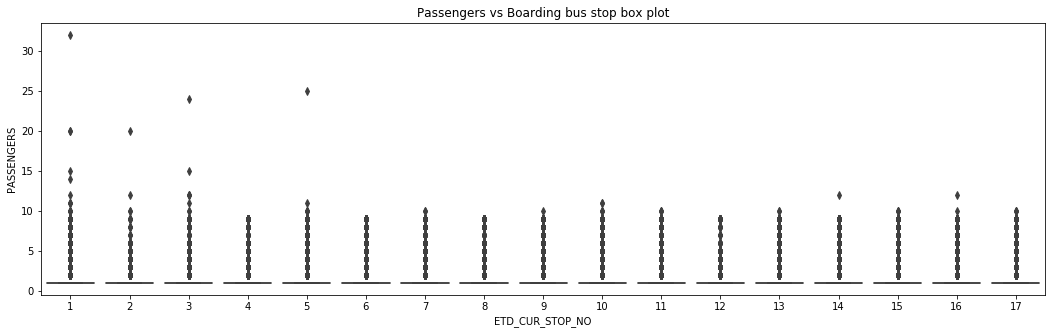

In [45]:
plt.figure(figsize=[18, 5])
sb.boxplot(data = df, x = 'ETD_CUR_STOP_NO', y = 'PASSENGERS',
               color = default_color)
plt.title("Passengers vs Boarding bus stop box plot");

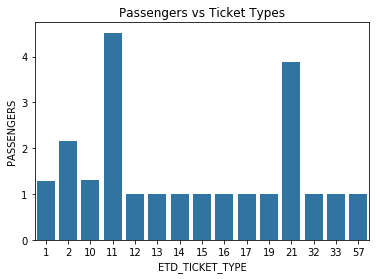

In [46]:
a = df.groupby("ETD_TICKET_TYPE").PASSENGERS.mean()
sb.barplot(x=a.index, y=a, color=default_color)
plt.title("Passengers vs Ticket Types");

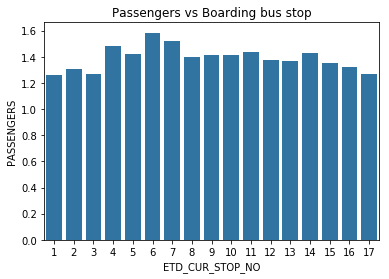

In [47]:
a = df.groupby("ETD_CUR_STOP_NO").PASSENGERS.mean()
sb.barplot(x=a.index, y=a, color=default_color)
plt.title("Passengers vs Boarding bus stop");

- Here for ticket type 11 average passengers more than 4, which is maximum.
- For ticket types 12 to 19 and 32 to 57, average passenger is one.
- On average close to 1.6, passengers boards from bus stop 6.
- Boxplot for passengers with respect to boarding bus stop does not give clear information. Though it seems from bus top 1, once more than 30 passengers boarded which according to dataset is highly unlikely, can be considered as outlier. 